Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. 
You are provided with rental data for 2 years. 

You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Columns description:
    
    datetime — hourly date + timestamp 
    season — 1 = spring, 2 = summer, 3 = fall, 4 = winter 
    holiday — whether the day is considered a holiday
    workingday — whether the day is neither a weekend nor holiday
    weather — 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    temp — temperature in Celsius
    atemp — “feels like” temperature in Celsius
    humidity — relative humidity
    windspeed — wind speed
    casual — number of non-registered user rentals initiated
    registered — number of registered user rentals initiated
    count — number of total rentals

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [3]:
train_bikes=pd.read_csv('train_bikes.csv')


In [4]:
#print(train_bikes.to_string())

In [5]:
True in list(train_bikes['holiday']>1)

False

In [6]:
train_bikes['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [7]:
train_bikes['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [8]:
train_bikes['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [9]:
train_bikes['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [10]:
train_bikes['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [11]:
train_bikes['windspeed'].mean()

12.799395406945093

<AxesSubplot:xlabel='registered', ylabel='count'>

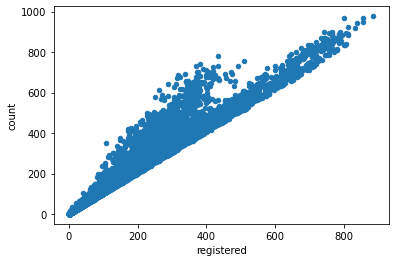

In [12]:
train_bikes.plot.scatter(x = 'registered', y = 'count')# plotting the counts based casual user

<AxesSubplot:xlabel='casual', ylabel='count'>

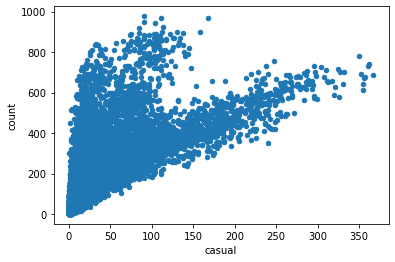

In [13]:
train_bikes.plot.scatter(x = 'casual', y = 'count')# plotting the counts based casual user

In [14]:
train_bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<AxesSubplot:xlabel='season', ylabel='count'>

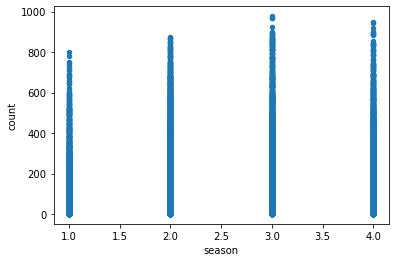

In [15]:
train_bikes.plot.scatter(x = 'season', y = 'count')

<AxesSubplot:xlabel='holiday', ylabel='count'>

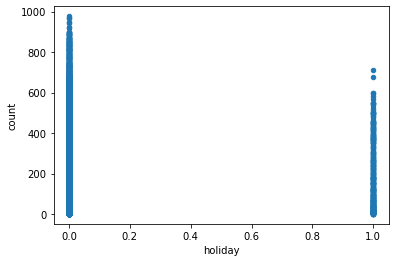

In [16]:
train_bikes.plot.scatter(x = 'holiday', y = 'count')

<AxesSubplot:xlabel='workingday', ylabel='count'>

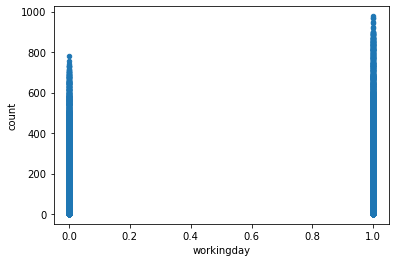

In [17]:
train_bikes.plot.scatter(x = 'workingday', y = 'count')

<AxesSubplot:xlabel='weather', ylabel='count'>

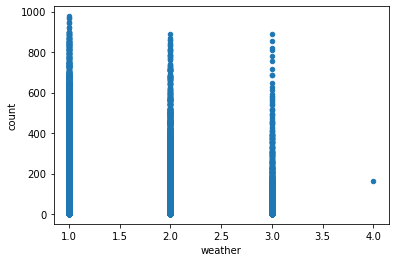

In [18]:
train_bikes.plot.scatter(x = 'weather', y = 'count')

<AxesSubplot:xlabel='temp', ylabel='count'>

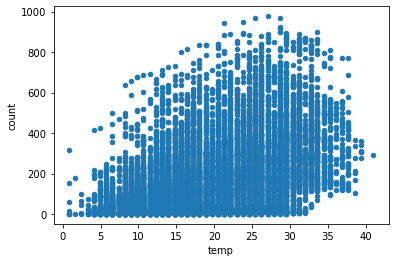

In [19]:
train_bikes.plot.scatter(x = 'temp', y = 'count')

<AxesSubplot:xlabel='atemp', ylabel='count'>

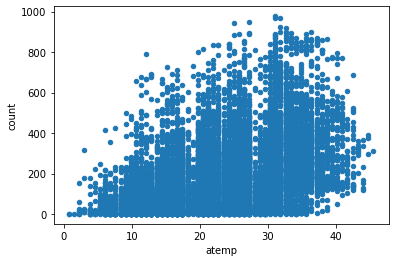

In [20]:
train_bikes.plot.scatter(x = 'atemp', y = 'count')

<AxesSubplot:xlabel='humidity', ylabel='count'>

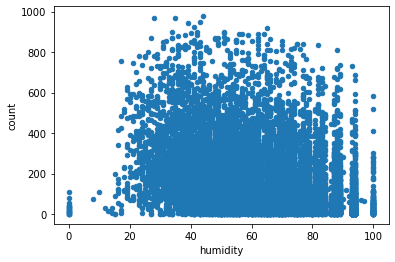

In [21]:
train_bikes.plot.scatter(x = 'humidity', y = 'count')

<AxesSubplot:xlabel='windspeed', ylabel='count'>

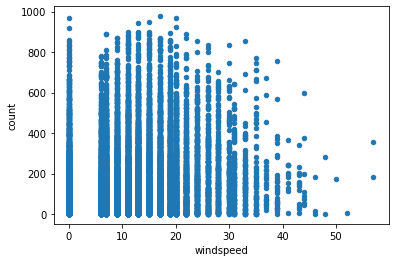

In [22]:
train_bikes.plot.scatter(x = 'windspeed', y = 'count')

<AxesSubplot:xlabel='windspeed', ylabel='count'>

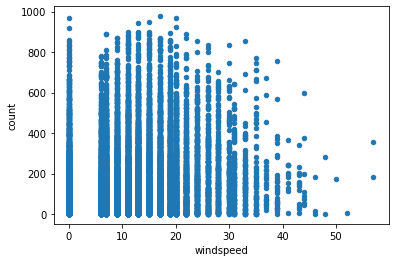

In [23]:
train_bikes.plot.scatter(x = 'windspeed', y = 'count')

In [24]:
train_bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [25]:
train_bikes['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [26]:
train_bikes['day']=pd.to_datetime(train_bikes['datetime'],format='%Y/%m/%d').dt.day

train_bikes['month']=pd.to_datetime(train_bikes['datetime'],format='%Y/%m/%d').dt.month

train_bikes['year']=pd.to_datetime(train_bikes['datetime'],format='%Y/%m/%d').dt.year

train_bikes['time']=pd.to_datetime(train_bikes['datetime'],format='%Y/%m/%d').dt.time

In [27]:
train_bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,2011,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2011,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,2011,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,2011,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2012,19:00:00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19,12,2012,20:00:00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19,12,2012,21:00:00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,19,12,2012,22:00:00


In [28]:
train_bikes.drop(columns='datetime',axis=1,inplace=True)

In [29]:
train_bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,time
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,2011,00:00:00
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011,01:00:00
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2011,02:00:00
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,2011,03:00:00
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,2011,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2012,19:00:00
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19,12,2012,20:00:00
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19,12,2012,21:00:00
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,19,12,2012,22:00:00


In [30]:
train_bikes['windspeed'].median()

12.998

In [31]:
train_bikes['windspeed'].mean()

12.799395406945093

In [32]:
train_bikes['windspeed'].replace(0,train_bikes['windspeed'].mean(),inplace=True)

In [33]:
train_bikes['windspeed']

0        12.799395
1        12.799395
2        12.799395
3        12.799395
4        12.799395
           ...    
10881    26.002700
10882    15.001300
10883    15.001300
10884     6.003200
10885     8.998100
Name: windspeed, Length: 10886, dtype: float64

In [34]:
train_bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,time
0,1,0,0,1,9.84,14.395,81,12.799395,3,13,16,1,1,2011,00:00:00
1,1,0,0,1,9.02,13.635,80,12.799395,8,32,40,1,1,2011,01:00:00
2,1,0,0,1,9.02,13.635,80,12.799395,5,27,32,1,1,2011,02:00:00
3,1,0,0,1,9.84,14.395,75,12.799395,3,10,13,1,1,2011,03:00:00
4,1,0,0,1,9.84,14.395,75,12.799395,0,1,1,1,1,2011,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.002700,7,329,336,19,12,2012,19:00:00
10882,4,0,1,1,14.76,17.425,57,15.001300,10,231,241,19,12,2012,20:00:00
10883,4,0,1,1,13.94,15.910,61,15.001300,4,164,168,19,12,2012,21:00:00
10884,4,0,1,1,13.94,17.425,61,6.003200,12,117,129,19,12,2012,22:00:00


In [35]:
train_bikes.drop(columns='holiday',axis=1,inplace=True)
train_bikes.drop(columns='atemp',axis=1,inplace=True)

In [36]:
train_bikes

,season,workingday,weather,temp,humidity,windspeed,casual,registered,count,day,month,year,time
0,1,0,1,9.84,81,12.799395,3,13,16,1,1,2011,00:00:00
1,1,0,1,9.02,80,12.799395,8,32,40,1,1,2011,01:00:00
2,1,0,1,9.02,80,12.799395,5,27,32,1,1,2011,02:00:00
3,1,0,1,9.84,75,12.799395,3,10,13,1,1,2011,03:00:00
4,1,0,1,9.84,75,12.799395,0,1,1,1,1,2011,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,1,15.58,50,26.002700,7,329,336,19,12,2012,19:00:00
10882,4,1,1,14.76,57,15.001300,10,231,241,19,12,2012,20:00:00
10883,4,1,1,13.94,61,15.001300,4,164,168,19,12,2012,21:00:00
10884,4,1,1,13.94,61,6.003200,12,117,129,19,12,2012,22:00:00


In [37]:
train_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   workingday  10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   humidity    10886 non-null  int64  
 5   windspeed   10886 non-null  float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  int64  
 9   day         10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  time        10886 non-null  object 
dtypes: float64(2), int64(10), object(1)
memory usage: 1.1+ MB


In [38]:
train_bikes['time']

0        00:00:00
1        01:00:00
2        02:00:00
3        03:00:00
4        04:00:00
           ...   
10881    19:00:00
10882    20:00:00
10883    21:00:00
10884    22:00:00
10885    23:00:00
Name: time, Length: 10886, dtype: object

In [39]:
str(train_bikes['time'][10884]).split(':')[0]

'22'

In [40]:
hour=[]

for i in range(0,len(train_bikes['time'])):
    hour.append(int(str(train_bikes['time'][i]).split(':')[0]))

In [41]:
hour

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9

In [42]:
train_bikes['hour']=hour

In [43]:
train_bikes

,season,workingday,weather,temp,humidity,windspeed,casual,registered,count,day,month,year,time,hour
0,1,0,1,9.84,81,12.799395,3,13,16,1,1,2011,00:00:00,0
1,1,0,1,9.02,80,12.799395,8,32,40,1,1,2011,01:00:00,1
2,1,0,1,9.02,80,12.799395,5,27,32,1,1,2011,02:00:00,2
3,1,0,1,9.84,75,12.799395,3,10,13,1,1,2011,03:00:00,3
4,1,0,1,9.84,75,12.799395,0,1,1,1,1,2011,04:00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,1,15.58,50,26.002700,7,329,336,19,12,2012,19:00:00,19
10882,4,1,1,14.76,57,15.001300,10,231,241,19,12,2012,20:00:00,20
10883,4,1,1,13.94,61,15.001300,4,164,168,19,12,2012,21:00:00,21
10884,4,1,1,13.94,61,6.003200,12,117,129,19,12,2012,22:00:00,22


<AxesSubplot:xlabel='hour', ylabel='count'>

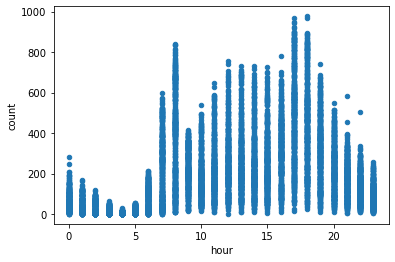

In [44]:
train_bikes.plot.scatter(x = 'hour', y = 'count')

In [45]:

train_bikes.drop(columns='time',axis=1,inplace=True)
train_bikes.drop(columns='casual',axis=1,inplace=True)
train_bikes.drop(columns='registered',axis=1,inplace=True)
train_bikes.drop(columns='day',axis=1,inplace=True)
train_bikes.drop(columns='month',axis=1,inplace=True)

#Feature Leakage
#If we look carefully at our data, we will see that the addition of the casual and registered columns yield to the cnt column. This is what we call leakage and for that reason, we will remove them from our dataset.

In [46]:
train_bikes

,season,workingday,weather,temp,humidity,windspeed,count,year,hour
0,1,0,1,9.84,81,12.799395,16,2011,0
1,1,0,1,9.02,80,12.799395,40,2011,1
2,1,0,1,9.02,80,12.799395,32,2011,2
3,1,0,1,9.84,75,12.799395,13,2011,3
4,1,0,1,9.84,75,12.799395,1,2011,4
...,...,...,...,...,...,...,...,...,...
10881,4,1,1,15.58,50,26.002700,336,2012,19
10882,4,1,1,14.76,57,15.001300,241,2012,20
10883,4,1,1,13.94,61,15.001300,168,2012,21
10884,4,1,1,13.94,61,6.003200,129,2012,22


In [47]:
train_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   workingday  10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   humidity    10886 non-null  int64  
 5   windspeed   10886 non-null  float64
 6   count       10886 non-null  int64  
 7   year        10886 non-null  int64  
 8   hour        10886 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 765.5 KB


In [48]:
X=train_bikes.drop(columns='count',axis=1)

In [49]:
y=train_bikes['count']

In [50]:
X

,season,workingday,weather,temp,humidity,windspeed,year,hour
0,1,0,1,9.84,81,12.799395,2011,0
1,1,0,1,9.02,80,12.799395,2011,1
2,1,0,1,9.02,80,12.799395,2011,2
3,1,0,1,9.84,75,12.799395,2011,3
4,1,0,1,9.84,75,12.799395,2011,4
...,...,...,...,...,...,...,...,...
10881,4,1,1,15.58,50,26.002700,2012,19
10882,4,1,1,14.76,57,15.001300,2012,20
10883,4,1,1,13.94,61,15.001300,2012,21
10884,4,1,1,13.94,61,6.003200,2012,22


In [51]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=192)

In [54]:
X_train

,season,workingday,weather,temp,humidity,windspeed,year,hour
244,1,1,2,8.20,59,6.0032,2011,13
1028,1,1,1,9.02,64,31.0009,2011,9
7673,2,0,1,20.50,51,7.0015,2012,2
3754,3,1,3,24.60,88,8.9981,2011,9
4181,4,1,1,16.40,66,12.9980,2011,6
...,...,...,...,...,...,...,...,...
1320,1,0,1,16.40,37,19.9995,2011,21
4203,4,1,1,16.40,87,7.0015,2011,4
8502,3,0,1,35.26,47,8.9981,2012,15
7033,2,1,2,13.94,49,22.0028,2012,10


In [55]:
X_test

,season,workingday,weather,temp,humidity,windspeed,year,hour
10575,4,1,2,9.84,70,12.998000,2012,1
7433,2,1,3,22.96,88,30.002600,2012,2
9208,3,1,1,25.42,88,7.001500,2012,1
5535,1,1,1,13.94,36,11.001400,2012,18
6562,1,0,1,14.76,23,12.799395,2012,16
...,...,...,...,...,...,...,...,...
5785,1,0,1,4.92,54,6.003200,2012,5
8038,2,1,1,22.96,83,11.001400,2012,7
6691,1,1,2,17.22,82,12.998000,2012,2
1804,2,1,2,18.04,77,15.001300,2011,2


In [56]:
y_train

244      52
1028    134
7673     69
3754    190
4181    114
       ... 
1320     93
4203      5
8502    489
7033    153
9314    247
Name: count, Length: 6531, dtype: int64

In [57]:
y_test

10575     28
7433       1
9208      29
5535     383
6562     390
        ... 
5785       6
8038     430
6691       4
1804      35
4686     466
Name: count, Length: 4355, dtype: int64

# standardization


In [58]:

scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [59]:
X_train = scaler.transform(X_train)

In [60]:
X_train

array([[-1.34583625,  0.68119125,  0.93361022, ..., -1.24668188,
        -0.99191752,  0.21401913],
       [-1.34583625,  0.68119125, -0.65591229, ...,  2.48875178,
        -0.99191752, -0.36464323],
       [-0.45448076, -1.46801651, -0.65591229, ..., -1.09750482,
         1.00814834, -1.37730234],
       ...,
       [ 0.43687474, -1.46801651, -0.65591229, ..., -0.7991507 ,
         1.00814834,  0.5033503 ],
       [-0.45448076,  0.68119125,  0.93361022, ...,  1.14415585,
         1.00814834, -0.21997764],
       [ 0.43687474,  0.68119125, -0.65591229, ..., -1.24668188,
         1.00814834, -0.07531205]])

In [61]:
X_test=scaler.transform(X_test)

In [62]:
X_test

array([[ 1.32823024,  0.68119125,  0.93361022, ..., -0.20144126,
         1.00814834, -1.52196793],
       [-0.45448076,  0.68119125,  2.52313272, ...,  2.33957472,
         1.00814834, -1.37730234],
       [ 0.43687474,  0.68119125, -0.65591229, ..., -1.09750482,
         1.00814834, -1.52196793],
       ...,
       [-1.34583625,  0.68119125,  0.93361022, ..., -0.20144126,
         1.00814834, -1.37730234],
       [-0.45448076,  0.68119125,  0.93361022, ...,  0.09791405,
        -0.99191752, -1.37730234],
       [ 1.32823024,  0.68119125, -0.65591229, ..., -1.09750482,
        -0.99191752, -0.50930881]])

# Algorithms

# 1.Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

   
reg = LinearRegression().fit(X_train, y_train)
 
    
    
  

 # Get the RMSE for the train dataset
print('Train RMSE :',np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))
 
# Get the RMSE for the test dataset
print('Test RMSE :',np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

Train RMSE : 140.44487565494353
Test RMSE : 144.29849571143117


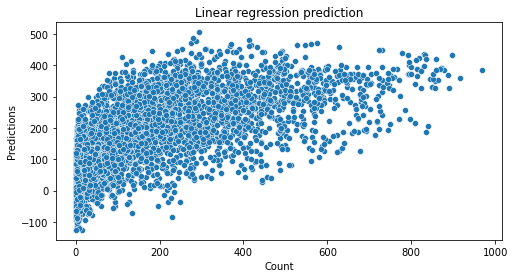

In [64]:
plt.figure(figsize = (8,4))
pred = reg.predict(X_test)
sns.scatterplot(x = y_test, y = pred)
plt.xlabel('Count')
plt.ylabel('Predictions')
plt.title('Linear regression prediction')
plt.show()

# Note :

#### Underfitting models: In general High Train RMSE, High Test RMSE. 


#### Overfitting models: In general Low Train RMSE , Very High Test RMSE. .

In [65]:
from sklearn.metrics import r2_score

R_Squared =(r2_score(y_test,reg.predict(X_test)))

print('R_Squared :', R_Squared)

R_Squared : 0.37778666646794223


#### Adjusted R-Squared is always smaller than R-Squared

In [66]:
Adj_R_Squared = 1 - (   (1 - R_Squared) * ( len(y_test) - 1)  /  (  len(y_test) - (X_test.shape[1]) -1  )    )
     
     
print('Adj_R_Squared :', Adj_R_Squared)

Adj_R_Squared : 0.37664131288573877


# 2.Random Forest


In [67]:

from sklearn.ensemble import RandomForestRegressor
 
rf = RandomForestRegressor().fit(X_train, y_train)
 
# Get the RMSE for the train dataset
print('Train RMSE :',np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))
 
# Get the RMSE for the test dataset
print('Test RMSE :',np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

Train RMSE : 18.34138925610206
Test RMSE : 48.751154889225795


In [68]:
rf.score(X_test, y_test)

0.9289792060784734

In [69]:
from sklearn.metrics import r2_score

R_Squared =(r2_score(y_test,rf.predict(X_test)))

print('R_Squared :', R_Squared)

R_Squared : 0.9289792060784734


In [70]:
Adj_R_Squared = 1 - (   (1 - R_Squared) * ( len(y_test) - 1)  /  (  len(y_test) - (X_test.shape[1]) -1  )    )
     
     
print('Adj_R_Squared :', Adj_R_Squared)

Adj_R_Squared : 0.9288484729097269


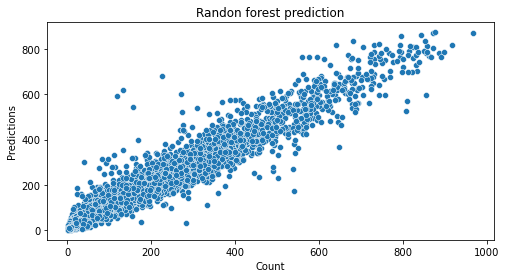

In [71]:
plt.figure(figsize = (8,4))

pred = rf.predict(X_test)

sns.scatterplot(x = y_test, y = pred)

plt.xlabel('Count')
plt.ylabel('Predictions')
plt.title('Randon forest prediction')
plt.show()

C:\Users\RASHMI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RASHMI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


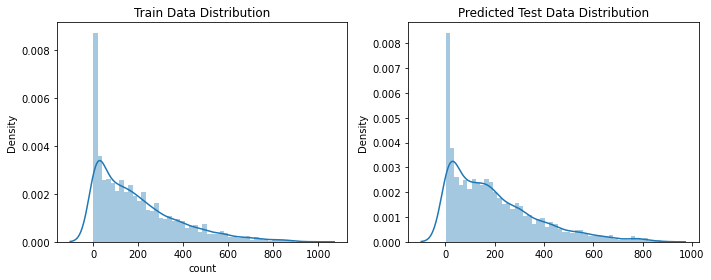

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt


figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.distplot(y_test, ax=axes[0], bins=50)
axes[0].set_title('Train Data Distribution')


sns.distplot(rf.predict(X_test), ax=axes[1], bins=50)
axes[1].set_title('Predicted Test Data Distribution');

figure.tight_layout() # # to adjust overlapping.

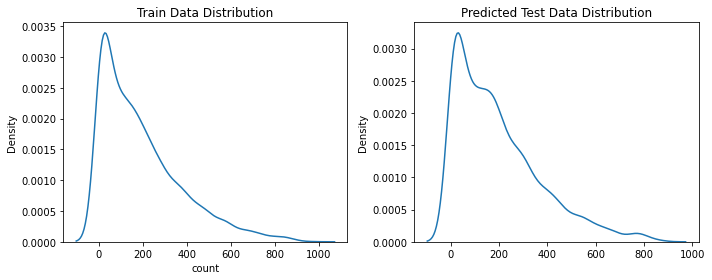

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt


figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.kdeplot(y_test, ax=axes[0])
axes[0].set_title('Train Data Distribution')


sns.kdeplot(rf.predict(X_test), ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

figure.tight_layout()

In [74]:
#Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = { 
    'n_estimators': [100,600,900],
    'max_features': ['auto'],
    'max_depth' : [4,9,16],
}
#https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv/notebook

In [79]:
CV_rfc= GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 9, 16], 'max_features': ['auto'],
                         'n_estimators': [100, 600, 900]})

In [80]:
CV_rfc.best_params_

{'max_depth': 16, 'max_features': 'auto', 'n_estimators': 900}

In [81]:
rf1=RandomForestRegressor(random_state=42, max_features='auto', n_estimators= 600, max_depth=18)

In [82]:
rf1.fit(X_train, y_train)

C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=18, max_features='auto', n_estimators=600,
                      random_state=42)

In [83]:
rf1.score(X_test, y_test)

0.9304247506842181

In [84]:
from sklearn.metrics import r2_score

R_Squared =(r2_score(y_test,rf1.predict(X_test)))

print('R_Squared :', R_Squared)

R_Squared : 0.9304247506842181


# 3.Gradient Boost

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
 
gb = GradientBoostingRegressor().fit(X_train, y_train)
 
# Get the RMSE for the train dataset
print('Train RMSE :',np.sqrt(mean_squared_error(y_train, gb.predict(X_train))))
 
# Get the RMSE for the test dataset
print('Test RMSE :',np.sqrt(mean_squared_error(y_test, gb.predict(X_test))))

Train RMSE : 66.43704340445912
Test RMSE : 69.31423273430819


In [86]:
from sklearn.metrics import r2_score

R_Squared =(r2_score(y_test,gb.predict(X_test)))

print('R_Squared :', R_Squared)

R_Squared : 0.8564310425872059


In [87]:
Adj_R_Squared = 1 - (   (1 - R_Squared) * ( len(y_test) - 1)  /  (  len(y_test) - (X_test.shape[1]) -1  )    )
     
     
print('Adj_R_Squared :', Adj_R_Squared)

Adj_R_Squared : 0.8561667647088574


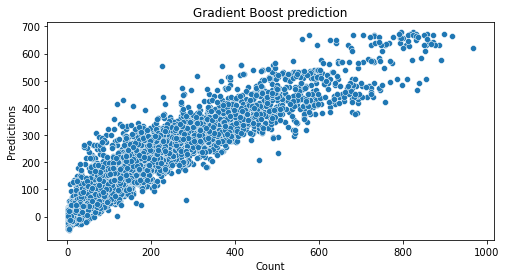

In [88]:
plt.figure(figsize = (8,4))
pred = gb.predict(X_test)
sns.scatterplot(x = y_test, y = pred)
plt.xlabel('Count')
plt.ylabel('Predictions')
plt.title('Gradient Boost prediction')
plt.show()

# Choose the Best Model
Based on the RMSE and R_squared on both train and test dataset, the best model is the Random Forest.

In [89]:
feat_importances = pd.DataFrame(rf.feature_importances_*100, index=X.columns, columns=["Importance"])

feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

feat_importances

,Importance
hour,60.103008
temp,12.538150
year,8.530992
workingday,7.704102
humidity,4.130428
season,3.724795
windspeed,1.760911
weather,1.507614


<AxesSubplot:>

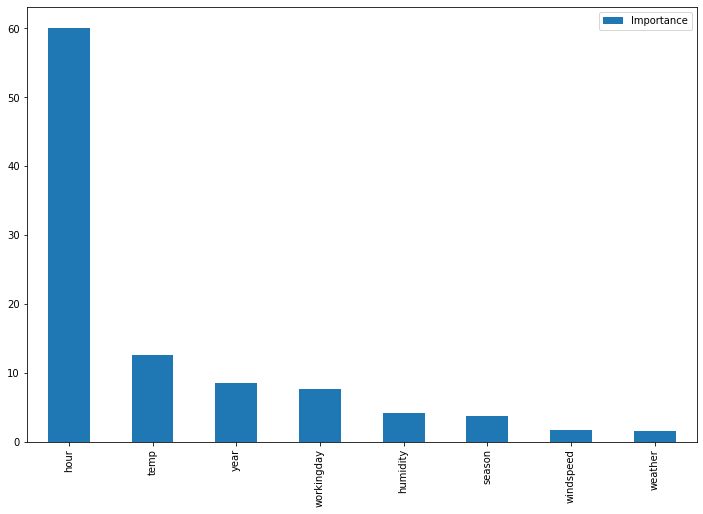

In [90]:
feat_importances.plot(kind='bar', figsize=(12,8))

As we can see the most important variables are:

The Hour with 60%

The Temperature with14%

The Year with 8%

<AxesSubplot:ylabel='Frequency'>

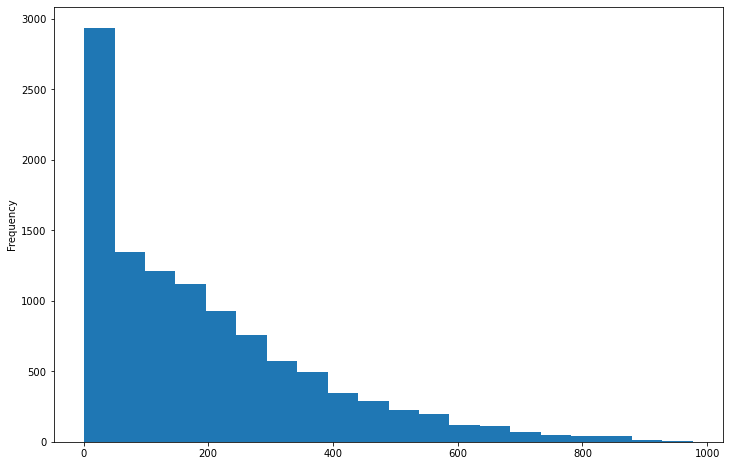

In [91]:
train_bikes['count'].plot.hist(bins=20, figsize=(12,8))


In [92]:
train_bikes.corr

<bound method DataFrame.corr of        season  workingday  weather   temp  humidity  windspeed  count  year  \
0           1           0        1   9.84        81  12.799395     16  2011   
1           1           0        1   9.02        80  12.799395     40  2011   
2           1           0        1   9.02        80  12.799395     32  2011   
3           1           0        1   9.84        75  12.799395     13  2011   
4           1           0        1   9.84        75  12.799395      1  2011   
...       ...         ...      ...    ...       ...        ...    ...   ...   
10881       4           1        1  15.58        50  26.002700    336  2012   
10882       4           1        1  14.76        57  15.001300    241  2012   
10883       4           1        1  13.94        61  15.001300    168  2012   
10884       4           1        1  13.94        61   6.003200    129  2012   
10885       4           1        1  13.12        66   8.998100     88  2012   

       hour  
0    

<AxesSubplot:>

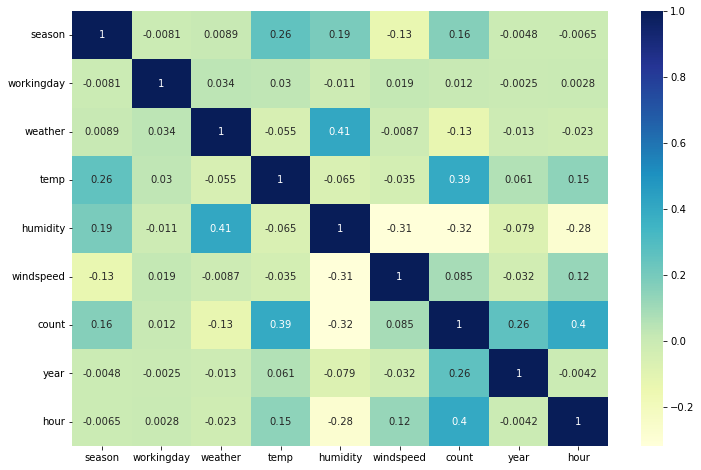

In [93]:
plt.figure(figsize=(12,8))
sns.heatmap(train_bikes.corr(), annot=True, cmap="YlGnBu")